<a href="https://colab.research.google.com/github/javierber/colab_proj_repo/blob/main/Kaggle_Fashion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from seaborn import heatmap

from sklearn.metrics import mean_squared_error, classification_report, \
confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow.keras as keras
from keras.optimizers import adam_v2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [3]:
#  You can use this function to see how your model improves over time
def plot_history(history, metric=None):
  """plot loss and passed metric.  metric is passed as string and must match 'metric'
  argument in the compile step"""
  fig, axes = plt.subplots(2,1, figsize = (5,10))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

In [5]:
#Load Data
#source https://www.kaggle.com/danialk/range-of-cnns-on-fashion-mnist-dataset
#source : https://www.kaggle.com/lykin22/cnn-fashion-mnist-image-classification#Convolutional-Neural-Network(CNN) 
batch_size = 512
train_data_df = pd.read_csv('/content/sample_data/fashion-mnist_train.csv', header=0)
test_data = pd.read_csv('/content/sample_data/fashion-mnist_test.csv', header=0)
train_data_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [ ]:
train_data_df.duplicated().any()

True

In [6]:
(X_train, y_train), (X_test, y_test)= keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [7]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [8]:
X_test.shape , y_test.shape

((10000, 28, 28), (10000,))

In [9]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [11]:
# label
y_train[0] 

9

In [12]:
class_labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle boot']

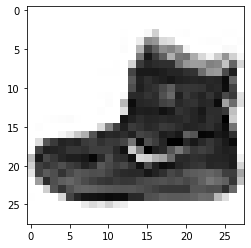

In [13]:
plt.imshow(X_train[0],cmap = 'Greys')

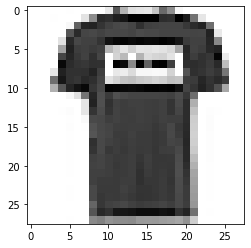

In [14]:
plt.imshow(X_train[1],cmap = 'Greys')

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X_train, y_train, test_size = 0.2 , random_state = 42)

In [17]:
X_train.shape, y_train.shape

((48000, 28, 28), (48000,))

In [18]:
X_test.shape, y_test.shape

((12000, 28, 28), (12000,))

In [19]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (1,1), padding = 'valid',activation = 'relu',input_shape = [28,28,1]), # 1st Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 128 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 2nd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Conv2D(filters = 64 , kernel_size = 3,strides = (2,2), padding = 'same',activation = 'relu',input_shape = [28,28,1]), # 3rd Layer
                         keras.layers.MaxPooling2D(pool_size = (2,2)),

                         keras.layers.Flatten(),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.5),
                         keras.layers.Dense(units = 256,activation = 'relu'),
                         keras.layers.Dropout(0.25),
                         keras.layers.Dense(units = 128,activation = 'relu'),
                         keras.layers.Dropout(0.10),
                         keras.layers.Dense(units = 10,activation = 'softmax')  
                        
])

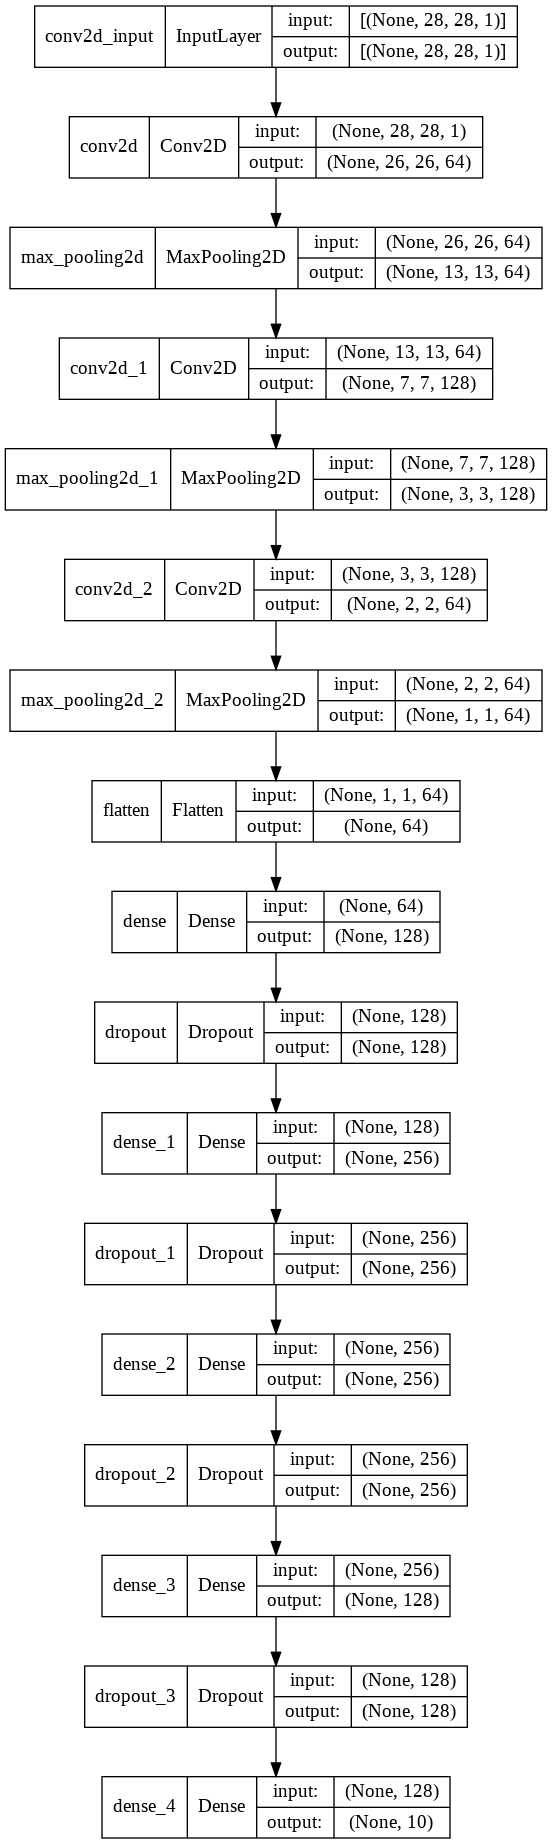

In [20]:
keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 64)          73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [22]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [23]:
model.fit(X_train,y_train,epochs = 20,batch_size = 512,verbose = 1, validation_data=(X_test,y_test))

Epoch 1/20
94/94 [==============================] - 49s 510ms/step - loss: 1.3383 - accuracy: 0.5271 - val_loss: 0.5731 - val_accuracy: 0.7897
Epoch 2/20
94/94 [==============================] - 48s 507ms/step - loss: 0.5752 - accuracy: 0.7898 - val_loss: 0.4386 - val_accuracy: 0.8457
Epoch 3/20
94/94 [==============================] - 48s 508ms/step - loss: 0.4610 - accuracy: 0.8394 - val_loss: 0.4053 - val_accuracy: 0.8569
Epoch 4/20
94/94 [==============================] - 48s 508ms/step - loss: 0.3983 - accuracy: 0.8631 - val_loss: 0.3605 - val_accuracy: 0.8733
Epoch 5/20
94/94 [==============================] - 48s 507ms/step - loss: 0.3676 - accuracy: 0.8722 - val_loss: 0.3532 - val_accuracy: 0.8788
Epoch 6/20
94/94 [==============================] - 48s 507ms/step - loss: 0.3332 - accuracy: 0.8844 - val_loss: 0.3175 - val_accuracy: 0.8875
Epoch 7/20
94/94 [==============================] - 47s 505ms/step - loss: 0.3080 - accuracy: 0.8918 - val_loss: 0.3328 - val_accuracy: 0.8835

In [24]:
# np.expand is used to change the 3 dimension data into 4 dimension
model.predict(np.expand_dims(X_test[0],axis = 0)).round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [25]:
np.argmax(model.predict(np.expand_dims(X_test[0],axis = 0)).round(2))

8

In [27]:
model.evaluate(X_test,y_test)

375/375 [==============================] - 4s 11ms/step - loss: 0.3302 - accuracy: 0.8990


[0.330231249332428, 0.8989999890327454]

In [26]:
# cross check 
y_test[0]

8

In [29]:
y_pred = model.predict(X_test).round(2)
y_pred

array([[0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 1.  , 0.  ],
       [0.19, 0.05, 0.27, ..., 0.01, 0.02, 0.01]], dtype=float32)

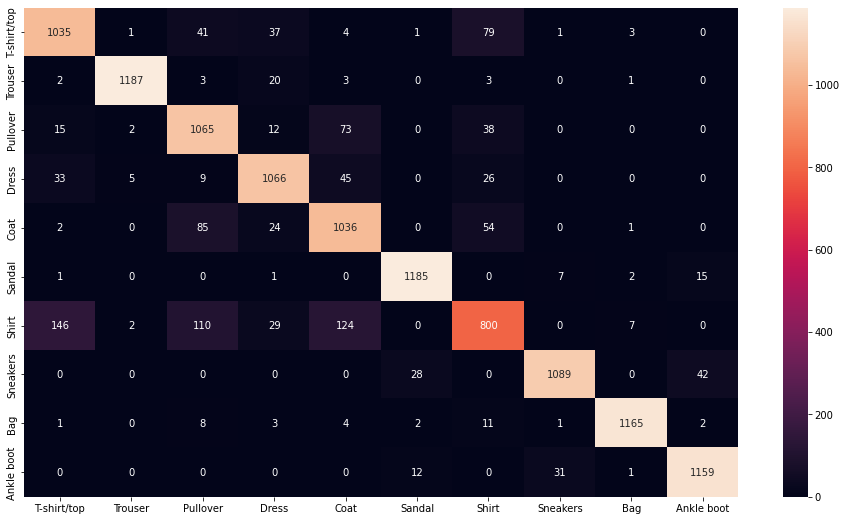

In [36]:
plt.figure(figsize = (16,9))
y_pred_labels = [np.argmax(label) for label in y_pred]
cm = confusion_matrix(y_test,y_pred_labels)
sns.heatmap(cm , annot = True,fmt = 'd',xticklabels = class_labels,yticklabels = class_labels)

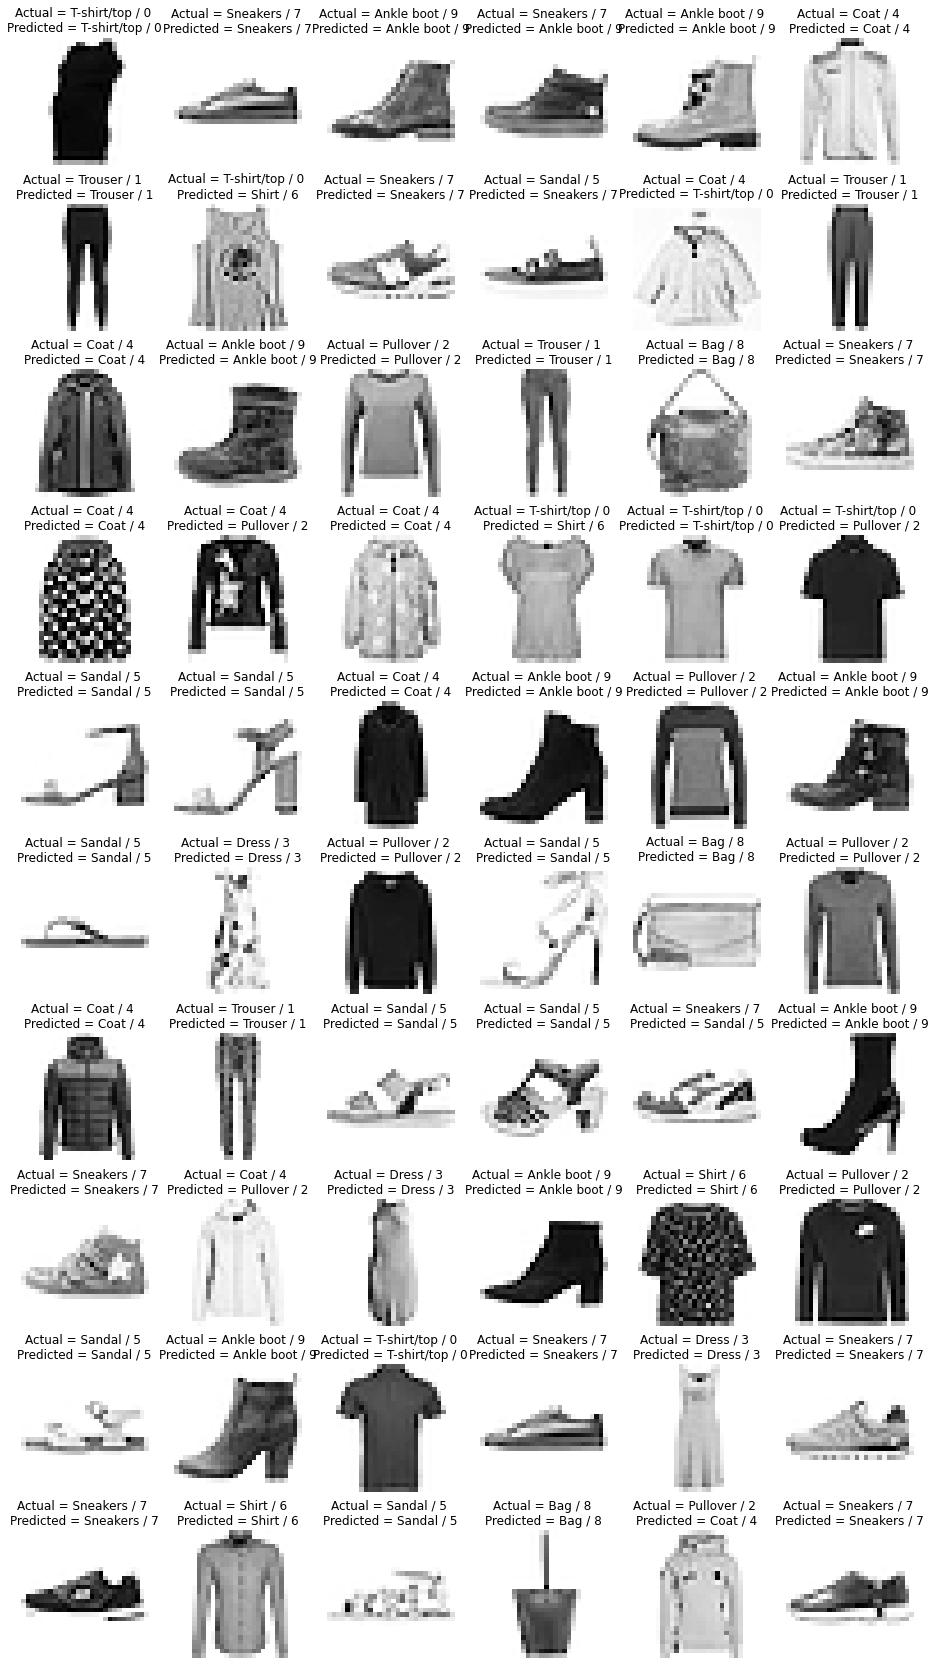

In [37]:
plt.figure(figsize=(16,30))
j = 1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j); j+=1
  plt.imshow(X_test[i].reshape(28,28),cmap = 'Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]],y_test[i],class_labels[np.argmax(y_pred[i])],np.argmax(y_pred[i])))

In [38]:
cr = classification_report (y_test,y_pred_labels,target_names = class_labels)
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.86      0.85      1202
     Trouser       0.99      0.97      0.98      1219
    Pullover       0.81      0.88      0.84      1205
       Dress       0.89      0.90      0.90      1184
        Coat       0.80      0.86      0.83      1202
      Sandal       0.96      0.98      0.97      1211
       Shirt       0.79      0.66      0.72      1218
    Sneakers       0.96      0.94      0.95      1159
         Bag       0.99      0.97      0.98      1197
  Ankle boot       0.95      0.96      0.96      1203

    accuracy                           0.90     12000
   macro avg       0.90      0.90      0.90     12000
weighted avg       0.90      0.90      0.90     12000

